In [1]:
import pandas as pd
# from sklearn.manifold import TSNE
from cuml.manifold import TSNE
from cuml.manifold import UMAP
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import plotly.offline as pyo
from matplotlib import pyplot as plt

In [2]:
vertices_path = 'Vertices_Labels'

In [3]:
california_df = pd.read_parquet(f'{vertices_path}/California.parq')
florida_df = pd.read_parquet(f'{vertices_path}/Florida.parq')
idaho_df = pd.read_parquet(f'{vertices_path}/idaho.parq')
louisiana_df = pd.read_parquet(f'{vertices_path}/Louisiana.parq')
maine_df = pd.read_parquet(f'{vertices_path}/Maine.parq')
northcarolina_df = pd.read_parquet(f'{vertices_path}/NorthCarolina.parq')
texas_df = pd.read_parquet(f'{vertices_path}/Texas.parq')

In [4]:
def add_state_name_to_col(df, state_name):
    df['state'] = state_name
    return df

In [5]:
california_df = add_state_name_to_col(california_df, 'California')
florida_df = add_state_name_to_col(florida_df, 'Florida')
idaho_df = add_state_name_to_col(idaho_df, 'Idaho')
louisiana_df = add_state_name_to_col(louisiana_df, 'Louisiana')
maine_df = add_state_name_to_col(maine_df, 'Maine')
northcarolina_df = add_state_name_to_col(northcarolina_df, 'North Carolina')
texas_df = add_state_name_to_col(texas_df, 'Texas')

In [6]:
print(f"No of points in California is: {california_df.shape}")
print(f"No of points in Florida is: {florida_df.shape}")
print(f"No of points in Idaho is: {idaho_df.shape}")
print(f"No of points in Louisiana is: {louisiana_df.shape}")
print(f"No of points in Maine is: {maine_df.shape}")
print(f"No of points in North Carolina is: {northcarolina_df.shape}")
print(f"No of points in Texas is: {texas_df.shape}")

No of points in California is: (186383, 12)
No of points in Florida is: (1087787, 12)
No of points in Idaho is: (35244, 13)
No of points in Louisiana is: (494846, 12)
No of points in Maine is: (294372, 12)
No of points in North Carolina is: (518948, 12)
No of points in Texas is: (336584, 12)


In [13]:
big_df = pd.concat([california_df, florida_df, idaho_df, louisiana_df, maine_df, northcarolina_df, texas_df])
features_cols = ['Longitude', 'Latitude', 'len_forward', 'len_backward', 'angle', 'offset', 'ratio1', 'ratio2']
big_df_features = big_df[features_cols]

In [14]:
### Correlation between selected feature columns for all states

all_states_correlation_matrix = big_df_features.corr()
all_states_correlation_matrix

,Longitude,Latitude,len_forward,len_backward,angle,offset,ratio1,ratio2
Longitude,1.000000,0.142298,-0.001757,-0.001740,-0.047103,-0.673999,0.000315,-0.001434
Latitude,0.142298,1.000000,-0.009925,-0.009934,-0.005782,0.208172,0.000074,0.001122
len_forward,-0.001757,-0.009925,1.000000,-0.000862,-0.089500,-0.005611,-0.000026,-0.000005
len_backward,-0.001740,-0.009934,-0.000862,1.000000,-0.089297,-0.005619,0.000072,0.000028
angle,-0.047103,-0.005782,-0.089500,-0.089297,1.000000,0.012595,-0.001049,0.000656
offset,-0.673999,0.208172,-0.005611,-0.005619,0.012595,1.000000,0.000179,0.001675
ratio1,0.000315,0.000074,-0.000026,0.000072,-0.001049,0.000179,1.000000,0.013549
ratio2,-0.001434,0.001122,-0.000005,0.000028,0.000656,0.001675,0.013549,1.000000


In [7]:
# concatenated_df = pd.concat([california_df, idaho_df, louisiana_df])
# color_mapping = {'California': 0, 'Idaho': 1, 'Louisiana': 2}

concatenated_df = pd.concat([idaho_df, louisiana_df])
color_mapping = {'Idaho': 0, 'Louisiana': 1}

unique_states = concatenated_df['state'].unique()
labels = unique_states.tolist()

concatenated_df['density'] = concatenated_df.groupby('state')['state'].transform('count')
max_density = concatenated_df['density'].max()
concatenated_df['alpha'] = concatenated_df['density'] / max_density


concatenated_df['color'] = concatenated_df['state'].map(color_mapping)

features = concatenated_df[['Longitude', 'Latitude', 'len_forward', 'len_backward', 'angle', 'offset',
                           'ratio1', 'ratio2', 'color']]

features

,Longitude,Latitude,len_forward,len_backward,angle,offset,ratio1,ratio2,color
0,-116.049086,49.000846,8.555860,37.428313,0.000000,0.000000,-0.116448,-0.000000,0
1,-116.049086,49.000846,8.555860,37.428313,0.000000,0.000000,-0.116448,-0.000000,0
2,-116.049086,49.000846,37.426141,7.482380,0.000000,0.000000,0.000000,0.000000,0
3,-116.049086,49.000846,37.426141,7.482380,0.000000,0.000000,0.000000,0.000000,0
4,-116.049087,49.000671,25.615619,8.555860,179.672895,4.777023,-0.379683,-0.053078,0
...,...,...,...,...,...,...,...,...,...
494841,-89.673971,29.867069,0.672046,1.893691,156.789540,63.315202,0.025924,0.639721,1
494842,-89.673977,29.867107,2.339647,0.672046,166.190181,34.506869,0.026703,0.305958,1
494843,-89.673998,29.867157,2.002652,2.339647,174.173455,14.393023,0.036610,0.121348,1
494844,-89.674016,29.867190,1.112434,2.002652,135.000104,89.042592,0.042319,1.209659,1


In [8]:
concatenated_df

,Longitude,Latitude,len_forward,len_backward,angle,arc_angle,triangular_area,point_counts,offset,ratio1,ratio2,case,state,area,arc,density,alpha,color
0,-116.049086,49.000846,8.555860,37.428313,0.000000,-90.327179,0.00000,310.0,0.000000,-0.116448,-0.000000,yes,Idaho,NaN,NaN,35244,0.071222,0
1,-116.049086,49.000846,8.555860,37.428313,0.000000,-90.327179,0.00000,310.0,0.000000,-0.116448,-0.000000,yes,Idaho,NaN,NaN,35244,0.071222,0
2,-116.049086,49.000846,37.426141,7.482380,0.000000,0.000000,0.00000,310.0,0.000000,0.000000,0.000000,yes,Idaho,NaN,NaN,35244,0.071222,0
3,-116.049086,49.000846,37.426141,7.482380,0.000000,0.000000,0.00000,310.0,0.000000,0.000000,0.000000,yes,Idaho,NaN,NaN,35244,0.071222,0
4,-116.049087,49.000671,25.615619,8.555860,179.672895,-90.000074,0.00167,310.0,4.777023,-0.379683,-0.053078,no,Idaho,NaN,NaN,35244,0.071222,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494841,-89.673971,29.867069,0.672046,1.893691,156.789540,NaN,NaN,NaN,63.315202,0.025924,0.639721,no,Louisiana,0.003342,98.973208,494846,1.000000,1
494842,-89.673977,29.867107,2.339647,0.672046,166.190181,NaN,NaN,NaN,34.506869,0.026703,0.305958,no,Louisiana,0.001588,112.783027,494846,1.000000,1
494843,-89.673998,29.867157,2.002652,2.339647,174.173455,NaN,NaN,NaN,14.393023,0.036610,0.121348,no,Louisiana,0.000660,118.609572,494846,1.000000,1
494844,-89.674016,29.867190,1.112434,2.002652,135.000104,NaN,NaN,NaN,89.042592,0.042319,1.209659,no,Louisiana,0.003004,73.609676,494846,1.000000,1


In [9]:
features.isna().sum()

Longitude       0
Latitude        0
len_forward     1
len_backward    0
angle           4
offset          0
ratio1          0
ratio2          0
color           0
dtype: int64

In [10]:
features_na_drop = features.dropna()
map_features = features_na_drop[['Longitude', 'Latitude', 'len_forward', 'len_backward', 'angle', 'offset',
                           'ratio1', 'ratio2']]
map_features

,Longitude,Latitude,len_forward,len_backward,angle,offset,ratio1,ratio2
0,-116.049086,49.000846,8.555860,37.428313,0.000000,0.000000,-0.116448,-0.000000
1,-116.049086,49.000846,8.555860,37.428313,0.000000,0.000000,-0.116448,-0.000000
2,-116.049086,49.000846,37.426141,7.482380,0.000000,0.000000,0.000000,0.000000
3,-116.049086,49.000846,37.426141,7.482380,0.000000,0.000000,0.000000,0.000000
4,-116.049087,49.000671,25.615619,8.555860,179.672895,4.777023,-0.379683,-0.053078
...,...,...,...,...,...,...,...,...
494840,-89.673988,29.867002,1.893691,0.232804,164.605402,69.530509,0.028068,0.917740
494841,-89.673971,29.867069,0.672046,1.893691,156.789540,63.315202,0.025924,0.639721
494842,-89.673977,29.867107,2.339647,0.672046,166.190181,34.506869,0.026703,0.305958
494843,-89.673998,29.867157,2.002652,2.339647,174.173455,14.393023,0.036610,0.121348


In [11]:
correlation_matrix = map_features.corr()
correlation_matrix

,Longitude,Latitude,len_forward,len_backward,angle,offset,ratio1,ratio2
Longitude,1.000000,-0.983836,0.012334,0.012322,-0.198333,0.003086,0.000196,0.000193
Latitude,-0.983836,1.000000,-0.018159,-0.018155,0.209427,-0.020184,-0.000928,-0.000551
len_forward,0.012334,-0.018159,1.000000,-0.003267,-0.163970,0.100797,-0.000061,-0.000074
len_backward,0.012322,-0.018155,-0.003267,1.000000,-0.158469,0.070302,0.000040,-0.000061
angle,-0.198333,0.209427,-0.163970,-0.158469,1.000000,-0.276502,-0.001384,-0.000540
offset,0.003086,-0.020184,0.100797,0.070302,-0.276502,1.000000,0.000581,0.002804
ratio1,0.000196,-0.000928,-0.000061,0.000040,-0.001384,0.000581,1.000000,0.039110
ratio2,0.000193,-0.000551,-0.000074,-0.000061,-0.000540,0.002804,0.039110,1.000000


### Visualizing using t-SNE

In [116]:
tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_neighbors=500, n_iter=5000)

/hdd4/srinath2/.conda/envs/rapids-23.06/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning:

Starting from version 22.04, the default method of TSNE is 'fft'.



In [117]:
projections = tsne.fit_transform(map_features)

[W] [16:06:13.856253] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


In [118]:
projections

,0,1
0,-7.098955,-116.844742
1,-7.107678,-116.837746
2,-7.124277,-116.748085
3,-7.124278,-116.748085
4,37.195362,105.178482
...,...,...
494840,-83.624947,-8.104551
494841,-102.325417,-8.200690
494842,-75.572586,82.476219
494843,-23.794456,109.223755


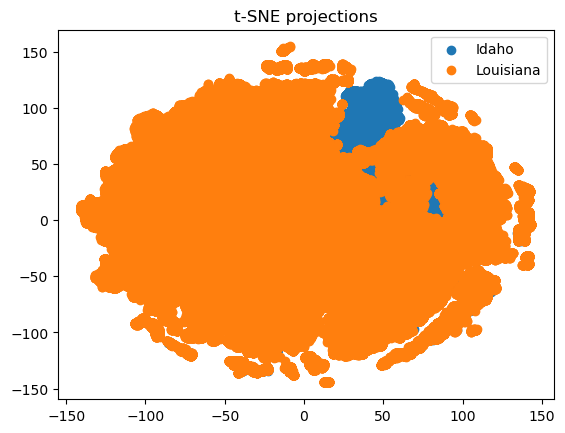

In [119]:
plt.figure()
for i, label in enumerate(labels):
    plt.scatter(projections[0][features_na_drop['color'] == i],
                projections[1][features_na_drop['color'] == i],
                label=label)

plt.legend()
plt.title("t-SNE projections")
plt.show()

In [120]:
# fig_2d = go.Figure()

# fig_2d.add_trace(go.Scatter(
#     x=projections[0],
#     y=projections[1],
#     mode='markers',
#     name='Embeddings',
#     marker=dict(
#         color=concatenated_df['color'],
#         colorscale='Viridis',
#     )
# ))

### Visualizing using UMAP

In [121]:
umap_2d = UMAP(n_components=2, random_state=0)

In [122]:
umap_projections = umap_2d.fit_transform(map_features)

In [123]:
umap_projections

,0,1
0,-1.598533,-6.981857
1,-1.588778,-6.992344
2,-1.642527,-6.990536
3,-1.644593,-6.996485
4,11.068277,-5.053797
...,...,...
494840,-0.806779,2.116421
494841,-5.533908,2.422125
494842,-4.756384,8.277121
494843,-1.774419,11.722159


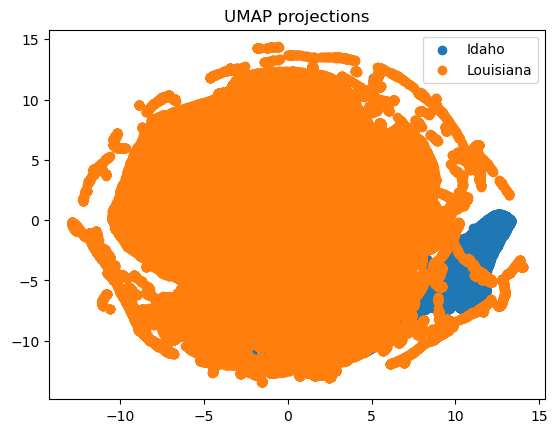

In [124]:
plt.figure()
for i, label in enumerate(labels):
    plt.scatter(umap_projections[0][features_na_drop['color'] == i],
                umap_projections[1][features_na_drop['color'] == i],
                label=label)

plt.legend()
plt.title("UMAP projections")
plt.show()

In [125]:
# np.save('california_idaho_louisiana_umap.npy', umap_projections)

In [56]:
# fig_2d = go.Figure()

# fig_2d.add_trace(go.Scatter(
#     x=umap_projections[:, 0],
#     y=umap_projections[:, 1],
#     mode='markers',
#     name='Embeddings',
#     marker=dict(
#         color=concatenated_df['color'],
#         colorscale='Viridis',
#     )
# ))

Output hidden; open in https://colab.research.google.com to view.

In [46]:
# fig_2d = px.scatter(
#     umap_projections, x=0, y=1,
#     color=concatenated_df.color[:-1], labels={'color': 'state'}
# )

In [57]:
# pyo.plot(fig_2d, filename='california_idaho__louisiana_umap.html')

'california_idaho__louisiana_umap.html'